In [2]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import glob
import getpass
import importlib
import functions
import spectrogram_plotting_functions
import scipy.signal
importlib.reload(functions)
importlib.reload(spectrogram_plotting_functions)

<module 'spectrogram_plotting_functions' from 'c:\\Users\\Thomas\\Desktop\\cpl_analysis_naman\\spectrogram_plotting_functions.py'>

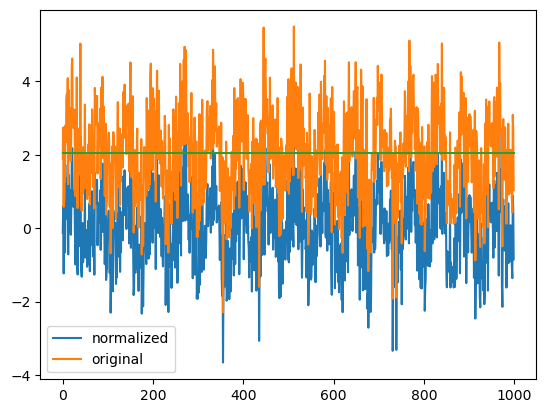

In [9]:
baseline_data=np.sin(np.linspace(0, 100, 1000))+np.random.normal(loc=2, scale=1, size=1000)
baseline_data_mean=np.mean(baseline_data)
baseline_data_std=np.std(baseline_data)
baseline_data_normalized=(baseline_data-baseline_data_mean)/baseline_data_std
plt.plot(baseline_data_normalized, label='normalized')
plt.plot(baseline_data, label='original')
plt.plot(np.ones(1000)*baseline_data_mean)
plt.legend()
plt.show()

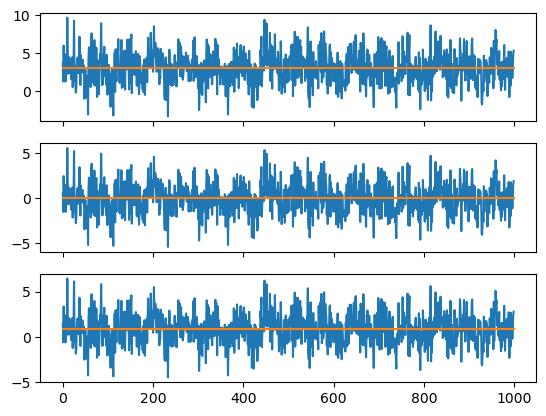

In [12]:
event_data=np.sin(np.linspace(0, 100, 1000))+np.random.normal(loc=3, scale=2, size=1000)
event_data_mean=np.mean(event_data)
event_data_normalize_by_event_mean_baseline_std=(event_data-event_data_mean)/baseline_data_std
event_data_normalize_by_baseline_mean_baseline_std=(event_data-baseline_data_mean)/baseline_data_std
fig, axs=plt.subplots(3, 1, sharex=True)
axs[0].plot(event_data, label='event')
axs[0].plot(event_data_mean*np.ones(1000), label='event mean')

axs[1].plot(event_data_normalize_by_event_mean_baseline_std, label='event normalized by event mean')
axs[1].plot(event_data_normalize_by_event_mean_baseline_std.mean()*np.ones(1000), label='event normalized by event mean mean')

axs[2].plot(event_data_normalize_by_baseline_mean_baseline_std, label='event normalized by baseline mean')
axs[2].plot(event_data_normalize_by_baseline_mean_baseline_std.mean()*np.ones(1000), label='event normalized by baseline mean mean')

plt.show()

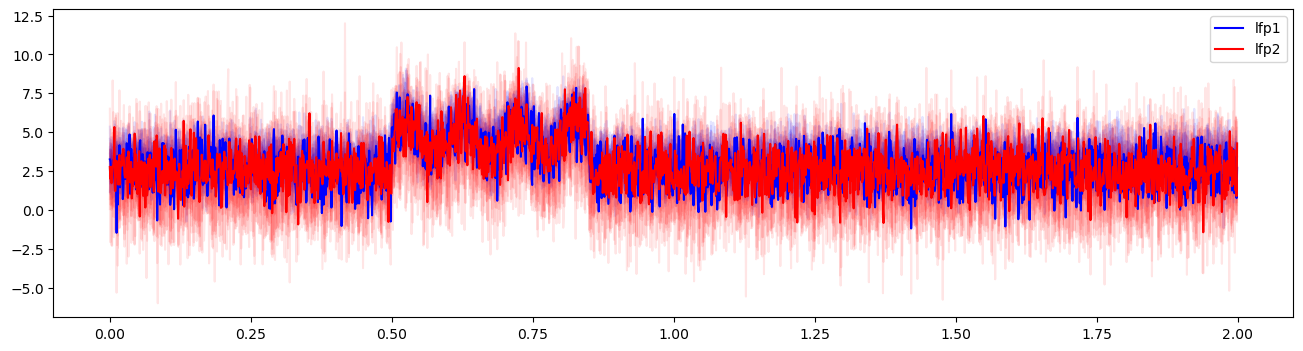

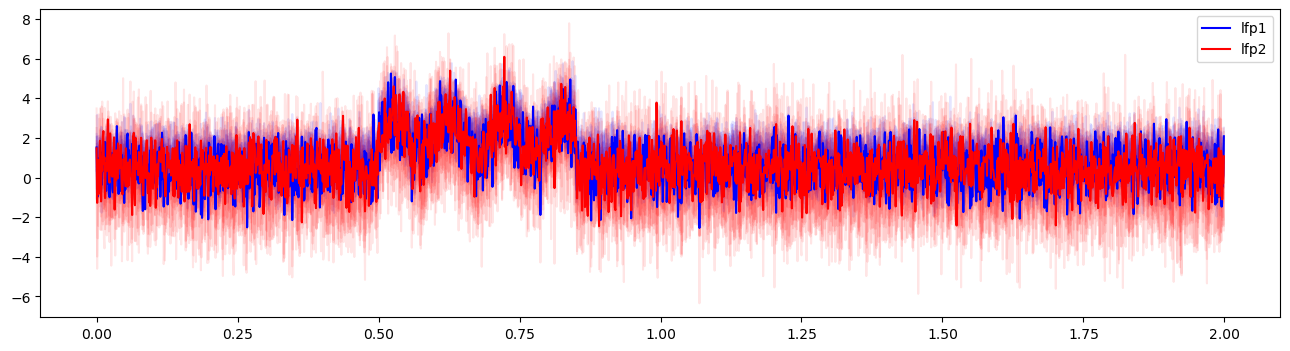

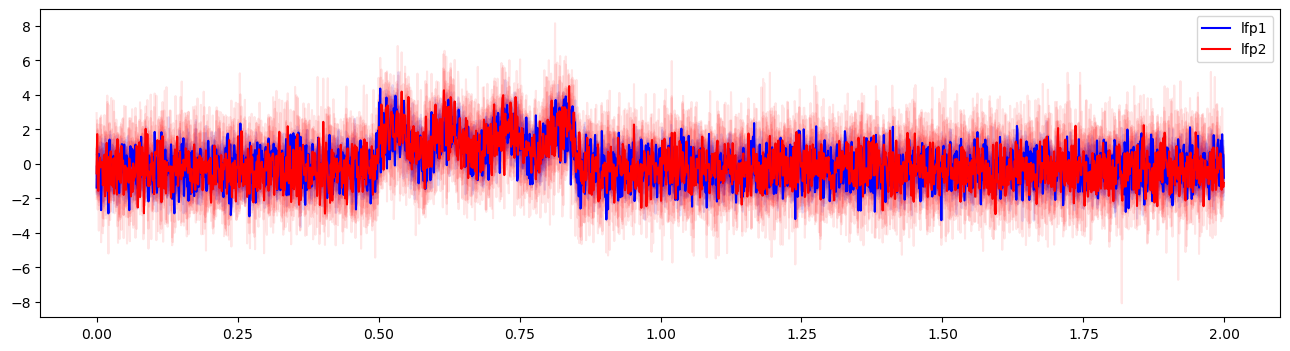

Connectivity computation...
    computing connectivity for 1 connections
    using t=0.000s..1.999s for estimation (2000 points)
    frequencies: 3.0Hz..99.0Hz (97 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
[Connectivity computation done]
Connectivity computation...
    computing connectivity for 1 connections
    using t=0.000s..1.999s for estimation (2000 points)
    frequencies: 3.0Hz..99.0Hz (97 points)
    using CWT with Morle

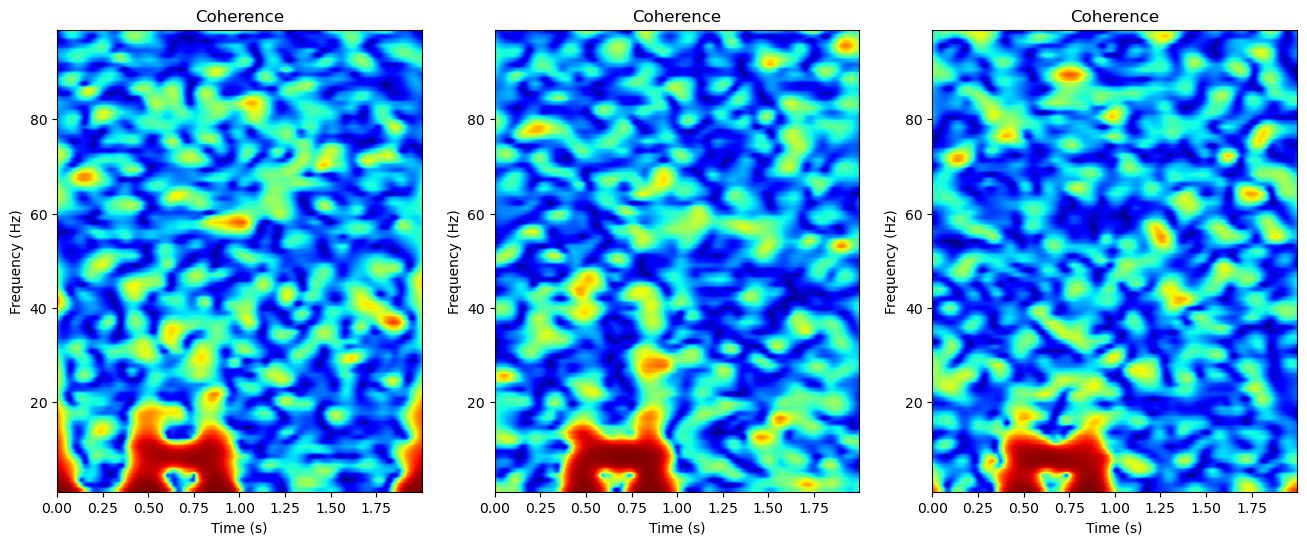

In [25]:
##Defining a function that takes the time, sampling frequency, and frequency of the oscillation and returns a epoch of generated LFP data

def generate_epoch(end_time, fs, osc_freq, osc_time_start, osc_time_end):

    times = np.arange(0, end_time, 1/fs)

    osc = np.sin(2 * np.pi * times[:] * osc_freq)[osc_time_start:osc_time_end] + 2
    trials = 10
    epochs = np.empty((trials, 2, len(times)))
    plt.figure(figsize=(16,4))

    for trial in range(0, trials):
        lfp1 = np.random.normal(3, 1, size=times.shape)
        lfp2 = np.random.normal(2, 2, size=times.shape)
        lfp1[osc_time_start:osc_time_end] += osc
        lfp2[osc_time_start:osc_time_end] += osc
        epochs[trial, 0, :] = lfp1
        epochs[trial, 1, :] = lfp2
        plt.plot(times, lfp1, color='blue', alpha=0.1)
        plt.plot(times, lfp2, color='red', alpha=0.1)
    plt.plot(times, np.mean(epochs[0,:,:], axis=0), color='blue', label='lfp1')
    plt.plot(times, np.mean(epochs[1,:,:], axis=0), color='red',label='lfp2')
    plt.legend()
    plt.show()
    return epochs, times

def generate_normalized_epoch_by_baseline_mean(end_time, fs, osc_freq, osc_time_start, osc_time_end):

    times = np.arange(0, end_time, 1/fs)
    baseline_data=np.sin(np.linspace(0, 100, len(times)))+np.random.normal(loc=2, scale=1, size=len(times))
    baseline_data_mean=np.mean(baseline_data)
    baseline_data_std=np.std(baseline_data)
    osc = np.sin(2 * np.pi * times[:] * osc_freq)[osc_time_start:osc_time_end] + 2
    trials = 10
    epochs = np.empty((trials, 2, len(times)))
    plt.figure(figsize=(16,4))

    for trial in range(0, trials):
        lfp1 = np.random.normal(3, 1, size=times.shape)
        lfp2 = np.random.normal(2, 2, size=times.shape)

        lfp1[osc_time_start:osc_time_end] += osc
        lfp2[osc_time_start:osc_time_end] += osc
        lfp1_normalized=(lfp1-baseline_data_mean)/baseline_data_std
        lfp2_normalized=(lfp2-baseline_data_mean)/baseline_data_std
        epochs[trial, 0, :] = lfp1_normalized
        epochs[trial, 1, :] = lfp2_normalized
        plt.plot(times, lfp1_normalized, color='blue', alpha=0.1)
        plt.plot(times, lfp2_normalized, color='red', alpha=0.1)
    plt.plot(times, np.mean(epochs[0,:,:], axis=0), color='blue', label='lfp1')
    plt.plot(times, np.mean(epochs[1,:,:], axis=0), color='red',label='lfp2')
    plt.legend()
    plt.show()
    return epochs, times

def generate_normalized_epoch_by_event_mean(end_time, fs, osc_freq, osc_time_start, osc_time_end):

    times = np.arange(0, end_time, 1/fs)
    baseline_data=np.sin(np.linspace(0, 100, len(times)))+np.random.normal(loc=2, scale=1, size=len(times))
    baseline_data_mean=np.mean(baseline_data)
    baseline_data_std=np.std(baseline_data)
    osc = np.sin(2 * np.pi * times[:] * osc_freq)[osc_time_start:osc_time_end] + 2
    trials = 10
    epochs = np.empty((trials, 2, len(times)))
    plt.figure(figsize=(16,4))

    for trial in range(0, trials):
        lfp1 = np.random.normal(3, 1, size=times.shape)
        lfp2 = np.random.normal(2, 2, size=times.shape)

        lfp1[osc_time_start:osc_time_end] += osc
        lfp2[osc_time_start:osc_time_end] += osc
        lfp1_normalized=(lfp1-np.mean(lfp1))/baseline_data_std
        lfp2_normalized=(lfp2-np.mean(lfp2))/baseline_data_std
        epochs[trial, 0, :] = lfp1_normalized
        epochs[trial, 1, :] = lfp2_normalized
        plt.plot(times, lfp1_normalized, color='blue', alpha=0.1)
        plt.plot(times, lfp2_normalized, color='red', alpha=0.1)
    plt.plot(times, np.mean(epochs[0,:,:], axis=0), color='blue', label='lfp1')
    plt.plot(times, np.mean(epochs[1,:,:], axis=0), color='red',label='lfp2')
    plt.legend()
    plt.show()
    return epochs, times

#thirty_epoch, thirty_times=generate_epoch(2, 1000, 30, 750, 1250)
epoch1,times1=generate_epoch(2, 1000, 10, 500, 850)
epoch2,times2=generate_normalized_epoch_by_baseline_mean(2, 1000, 10, 500, 850)
epoch3,times3=generate_normalized_epoch_by_event_mean(2, 1000, 10, 500, 850)


import mne_connectivity

fs=1000
freqs = np.arange(1,100)
n_cycles = freqs/2

fig,axs=plt.subplots(1, 3, figsize=(16, 6))
axs=axs.flatten()

for epoch, times, ax in zip([epoch1, epoch2, epoch3], [times1, times2, times3], axs):
    con = mne_connectivity.spectral_connectivity_epochs(epoch, method='coh', sfreq=int(fs),
                                                   mode='cwt_morlet', cwt_freqs=freqs,
                                                   cwt_n_cycles=n_cycles, verbose=True,
                                                   indices=(np.array([0]), np.array([1])))                                                   
    coh = con.get_data()

    ax.imshow(np.squeeze(coh), extent=[times[0], times[-1], freqs[0], freqs[-1]],
               aspect='auto', origin='lower', cmap='jet')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')
    ax.set_title('Coherence')
# con = mne_connectivity.spectral_connectivity_epochs(ten_epoch, method='coh', sfreq=int(fs),
#                                                    mode='cwt_morlet', cwt_freqs=freqs,
#                                                    cwt_n_cycles=n_cycles, verbose=True,
#                                                    indices=(np.array([0]), np.array([1])))                                                   
# coh = con.get_data()

# plt.imshow(np.squeeze(coh), extent=[ten_times[0], ten_times[-1], freqs[0], freqs[-1]],
#            aspect='auto', origin='lower', cmap='jet')
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency (Hz)')
# plt.colorbar(label='Coherence')
# plt.show()

In [ ]:
_